**Übung Mustererkennung** *WS 2022/23* -- *K. Brandenbusch,  Gernot A. Fink* -- *Technische Universität Dortmund, Lehrstuhl XII, Mustererkennung in eingebetteten Systemen*

___
# Aufgabe 5a: Hauptachsen-Transformation - Einführung

Zuerst muss das Notebook konfiguriert werden.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

# Uebergeordneten Ordner zum Pfad hinzufuegen, damit das common Package importiert werden kann
import sys
if '..' not in sys.path:
    sys.path.append('..')

In der Praxis haben Merkmalsvektoren deutlich mehr Dimensionen als die zweidimensionalen Beispiele mit denen Sie bislang gearbeitet haben.
Einen Klassifikator für hochdimensionale Merkmalsvektoren zu erstellen erfordert daher erheblich mehr Trainingsdaten.
Insbesonders ist zu erwarten, dass viele der Dimensionen keine relevante Information enthalten oder dass die unterschiedlichen Merkmalsvektorkomponenten stark korrelliert oder sogar linear abhängig sind.

Daher bietet es sich an, die Anzahl der Dimensionen auf die aussagekräftigsten Dimensionen zu reduzieren.
Ein Verfahren zur Dimensionsreduktion ist die *Hauptachsen-Transformation* oder *Principal Component Analysis* (PCA).

Eine Hauptachsen-Transformation wird wie folgt realisiert:  
Zunächst wird die Gesamtstreuungsmatrix $\underline S_T$ berechnet

$$
    \large \underline S_T = \frac{1}{N} \sum_{i=1}^N (\underline x_i - \underline m)(\underline x_i - \underline m)^T 
$$

wobei $\large \underline m =\frac{1}{N} \sum_i \underline x_i$.

Anschließend werden die Eigenvektoren $\large \varphi_\nu$ und Eigenwerte $\large \lambda_\nu$ von $ \underline S_T$ bestimmt

$$
    \large \underline S_T \varphi_\nu = \lambda_\nu \varphi_\nu
$$

wobei $\large \lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_n$ gilt.
- Wofür stehen die berechneten Eigenvektoren und ihre Eigenwerte?

Schließlich wird aus den Eigenvektoren eine Transformationsmatrix konstruiert

$$
    \large \underline \Phi = \begin{pmatrix} \underline \varphi_1^T \\ \vdots \\ \underline \varphi_n^T\end{pmatrix}
$$

- Wie lässt sich mit dieser Tranformation nun die Dimension der Daten reduzieren?
- Welche Annahme wird bei dieser Reduktion getroffen?
- Wie lässt sich der durch die Dimensionsreduktion entstandene Fehler bestimmen?

---
## Spielbeispiel
Zum besseren Verständnis der Hauptachsen-Transformation schauen Sie sich zunächst ein Spielbeispiel an. An diesem lassen sich die Konzepte einfacher visualisieren und nachvollziehen.

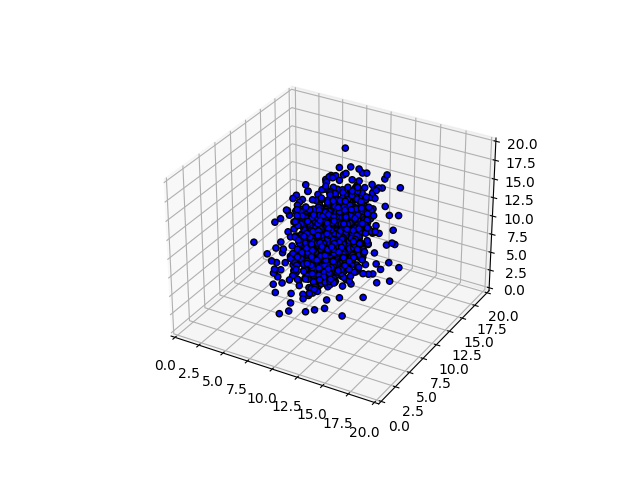

In [2]:
import numpy as np
from common.pca import PCA
import matplotlib.pyplot as plt

# Ein 3D Beispieldatensatz wird aus einer Normalverteilung generiert.
# Diese ist durch einen Mittelwert und eine Kovarianzmatrix definiert
mean = np.array([10, 10, 10])
cov = np.array([[3, .2, .9],
                [.2, 5, .4],
                [.9, .4, 9]])
n_samples = 1000
limits_samples = ((0, 20), (0, 20), (0, 20))
samples = np.random.multivariate_normal(mean, cov, n_samples)
# Plotten der Beispieldaten
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
PCA.plot_sample_data(samples, ax=ax)
PCA.set_axis_limits(ax, limits=limits_samples)


Die Klasse `PCA` im modul [`common.pca`](../common/pca.py) bietet ein Gerüst für eine Hauptachsen-Transformation, welches Sie in den nächsten Schritten vervollständigen werden.

### Schätzen

Implementieren Sie zunächst den Konstruktor der Klasse `PCA`, welcher den Mittelwert, die Eigenwerte und Eigenvektoren berechnet.
Achten sie darauf, dass Ihre Ergebnisse in den Variablen `self.train_mean`, `self.eig_vals` und `self.eig_vecs` gespeichert werden.
Andere vorgefertigte Funktionen, wie z.B. `PCA.plot_subspace` sind auf diese Werte angewiesen.

Tipp: Sollten Sie das Programmieren in Jupyter Notebook Zellen bevorzugen, erstellen Sie sich eine neue Zelle und entwickeln Sie ihren Prototypen darin.
Anschließend können Sie Ihre Implementierung in den Konstruktor kopieren.

Nützliche Funktionen:
- [np.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)
- [np.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)
- [np.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)

[9.04953972 5.07415063 2.86584836]


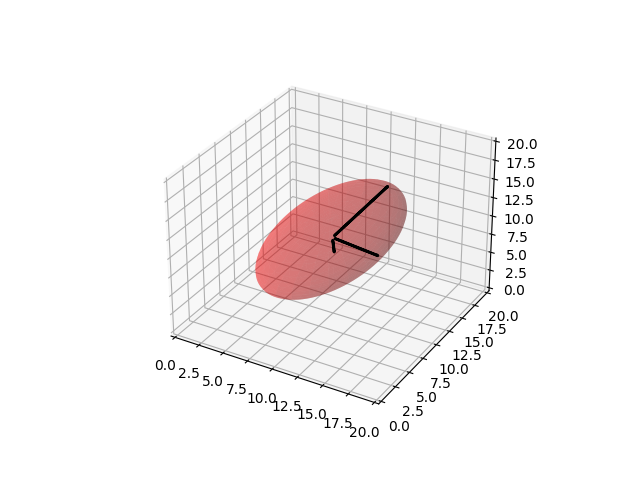

In [3]:
pca_tutorial = PCA(samples)
pca_tutorial.plot_subspace(limits=limits_samples,
                           color='r',
                           linewidth=0.05, alpha=0.3)

Durch "weglassen" von Dimensionen, beginnend mit den Dimensionen mit kleinstem Eigenwert, lässt sich die Dimension der Daten mit minimalem Rekonstruktionsfehler reduzieren.
Der folgende Plot illustriert den reduzierten Raum durch weglassen einer Dimension.

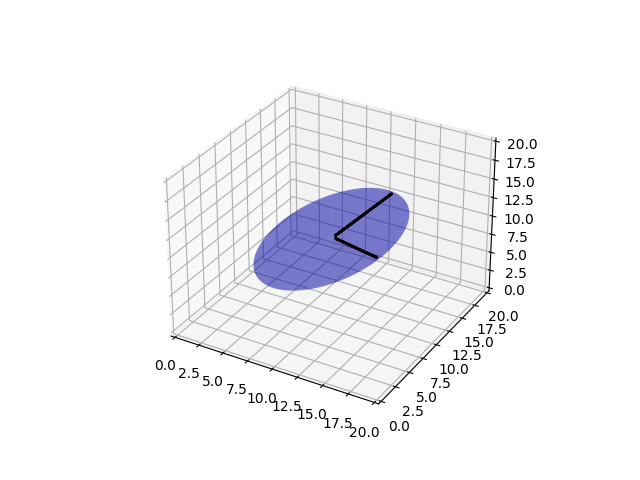

In [5]:
pca_tutorial.plot_subspace(limits=limits_samples, color='b', linewidth=0.05, alpha=0.3, target_dim=2)

### Transformieren
Transformieren Sie nun die 3D Beispieldaten in den 2D Unterraum.
Implementieren Sie dazu die Methode `PCA.transform_samples` im Modul [`common.pca`](../common/pca.py).  
Speichern Sie die transformierten Daten in der Variablen `samples_2d` und stellen Sie anschließend die 2D-Daten in einem 2D-Plot dar.

 sum rest eigen val: 3.0337989743205434


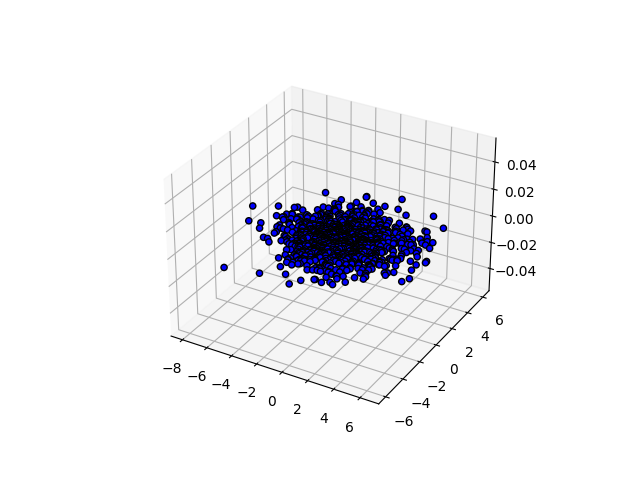

In [17]:
target_dim=2
samples_2d = pca_tutorial.transform_samples(samples, target_dim)
pca_tutorial.plot_sample_data(samples_2d)
#pca_tutorial.plot_subspace(limits=limits_samples, color='b', linewidth=0.05, alpha=0.3, target_dim=2)


Unten wird die Kovarianzmatrix der transformierten Daten berechnet.
- Welche Eigenschaften hat diese Matrix? (Dimension, etc.)
- In welcher Größenordnung liegen die einzelnen Einträge? Erklären Sie das anhand des vorherigen 2D Plots.
- Vergleichen Sie das Ergebnis mit der Kovarianzmatrix, die oben zur Generierung der Daten verwendet wurde. Erklären Sie den Mittelwert der transformierten Daten.

In [7]:
samples_2d_mean = np.sum(samples_2d, axis=0)
samples_2d_meanfree = samples_2d - samples_2d_mean
samples_2d_cov = np.dot(samples_2d_meanfree.T, samples_2d_meanfree) / samples_2d.shape[0]
np.set_printoptions(precision=2, suppress=True)
print('samples_2d mean')
print(samples_2d_mean)
print('samples_2d covariance matrix')
print(samples_2d_cov)

samples_2d mean
[-0. -0.]
samples_2d covariance matrix
[[ 5.01 -0.05]
 [-0.05  3.25]]
